## Spotify Song Attributes EDA
- Import dataset
- Exploratory Data Analysis to visualise data and observe structure
- Train a classifier (Decision Tree)

In [ ]:
# Note graphviz requires an environment variable to be added in windows path, see screen shots below the code for instructions.

In [1]:
#pip install graphviz

In [2]:
#pip install pydotplus

In [3]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
import imageio
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,target
count,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000
mean,1044.433212,0.547150,0.604742,5.186331,-9.276017,0.673597,0.316063,0.180233,0.196261,0.503928,120.152102,0.064521,2.462736e+05,3.929574,0.503928,123.726871,10.705042,878.907744,0.476871
std,624.333268,0.154609,0.260959,3.586700,5.057344,0.468958,0.340209,0.306580,0.165377,0.240459,28.746002,0.083672,9.804036e+04,0.330384,0.240459,59.203451,4.032240,399.455832,0.499530
min,0.000000,0.061900,0.007560,0.000000,-33.241000,0.000000,0.000001,0.000000,0.018500,0.031600,34.749000,0.022200,2.817300e+04,1.000000,0.031600,9.000000,2.000000,86.000000,0.000000
25%,496.000000,0.445000,0.412000,2.000000,-11.645500,0.000000,0.010300,0.000004,0.099100,0.314000,98.853500,0.033500,1.867450e+05,4.000000,0.314000,86.000000,8.000000,636.000000,0.000000
50%,1022.500000,0.552000,0.647000,5.000000,-8.006000,1.000000,0.163000,0.001585,0.128000,0.500000,118.848000,0.041800,2.280000e+05,4.000000,0.500000,113.000000,10.000000,798.500000,0.000000
75%,1595.000000,0.653250,0.825250,8.000000,-5.635000,1.000000,0.610250,0.214500,0.248250,0.692000,138.232750,0.061800,2.817830e+05,4.000000,0.692000,147.000000,12.000000,1017.000000,1.000000
max,2125.000000,0.960000,0.998000,11.000000,1.342000,1.000000,0.995000,0.981000,0.992000,0.989000,209.942000,0.959000,1.613827e+06,5.000000,0.989000,894.000000,62.000000,5408.000000,1.000000


In [6]:
df.head()

,Unnamed: 0,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,...,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,target
0,0,6Tt1P5CLUrl59oSOTVxON0,Joy,Bastille,['Bastille'],0.555,0.923,6,-4.748,0,...,0.363,118.007,0.1610,192681,4,0.363,92,8,654,1
1,1,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,"['Marshmello', 'Bastille']",0.687,0.792,5,-2.749,1,...,0.671,100.015,0.0452,214290,4,0.671,88,9,789,1
2,2,6fNhZRFEkBfgW39W3wKARJ,Pompeii,Bastille,['Bastille'],0.679,0.715,9,-6.383,1,...,0.571,127.435,0.0407,214148,4,0.571,113,11,761,1
3,3,1lwvJQGhdq6Kyr4BBquf23,survivin',Bastille,['Bastille'],0.787,0.780,7,-5.023,1,...,0.680,95.035,0.1290,173206,4,0.680,68,8,752,1
4,4,2Fn4gZI3MAeWTiv7cSVxZQ,Another Place,Bastille,"['Bastille', 'Alessia Cara']",0.685,0.742,8,-5.409,1,...,0.618,115.008,0.0471,213511,4,0.618,100,10,745,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3848 non-null   int64  
 1   id                3848 non-null   object 
 2   title             3848 non-null   object 
 3   first_artist      3848 non-null   object 
 4   all_artists       3848 non-null   object 
 5   danceability      3848 non-null   float64
 6   energy            3848 non-null   float64
 7   key               3848 non-null   int64  
 8   loudness          3848 non-null   float64
 9   mode              3848 non-null   int64  
 10  acousticness      3848 non-null   float64
 11  instrumentalness  3848 non-null   float64
 12  liveness          3848 non-null   float64
 13  valence           3848 non-null   float64
 14  tempo             3848 non-null   float64
 15  speechiness       3848 non-null   float64
 16  duration_ms       3848 non-null   int64  


In [8]:
# Split data up with 15% test data and 85% training data
train, test = train_test_split(df, test_size = 0.15)

In [9]:
print('Training size: {}; Test size: {}'.format(len(train), len(test)))

Training size: 3270; Test size: 578


In [10]:
train.shape

(3270, 23)

In [11]:
# custom colour palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

### Set the positive/negative values based on the 'target' column value being 1(like) or 0(dislike), for each chosen attribute.

In [12]:
pos_tempo = df[df['target']==1]['tempo']  #positive tempo variable
neg_tempo = df[df['target']==0]['tempo']  #negative tempo variable

pos_danceability = df[df['target']==1]['danceability']  #positive danceability variable
neg_danceability = df[df['target']==0]['danceability']  #negative danceability variable

pos_duration_ms = df[df['target']==1]['duration_ms']  #positive duration_ms variable
neg_duration_ms = df[df['target']==0]['duration_ms']  #negative duration_ms variable

pos_loudness = df[df['target']==1]['loudness']  #positive loudness variable
neg_loudness = df[df['target']==0]['loudness']  #negative loudness variable

pos_speechiness = df[df['target']==1]['speechiness']  #positive speechiness variable
neg_speechiness = df[df['target']==0]['speechiness']  #negative speechiness variable

pos_valence = df[df['target']==1]['valence']  #positive valence variable
neg_valence = df[df['target']==0]['valence']  #negative valence variable

pos_energy = df[df['target']==1]['energy']  #positive energy variable
neg_energy = df[df['target']==0]['energy']  #negative energy variable

pos_acousticness = df[df['target']==1]['acousticness']  #positive acousticness variable
neg_acousticness = df[df['target']==0]['acousticness']  #negative acousticness variable

pos_key = df[df['target']==1]['key']  #positive key variable
neg_key = df[df['target']==0]['key']  #negative key variable

pos_instrumentalness = df[df['target']==1]['instrumentalness']  #positive instrumentalness variable
neg_instrumentalness = df[df['target']==0]['instrumentalness']  #negative instrumentalness variable


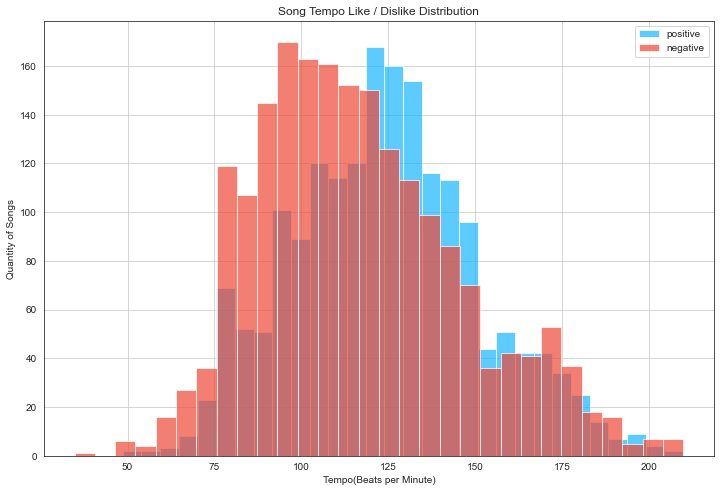

In [13]:
fig = plt.figure(figsize=(12, 8))
plt.title('Song Tempo Like / Dislike Distribution')
plt.xlabel("Tempo(Beats per Minute)")
plt.ylabel("Quantity of Songs")
pos_tempo.hist(alpha=0.7, bins= 30, label='positive')
neg_tempo.hist(alpha=0.7, bins= 30, label='negative')
plt.legend(loc = 'upper right')

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Song Instrumentalness Like distribution'}, xlabel='Instrumentalness', ylabel='Count'>

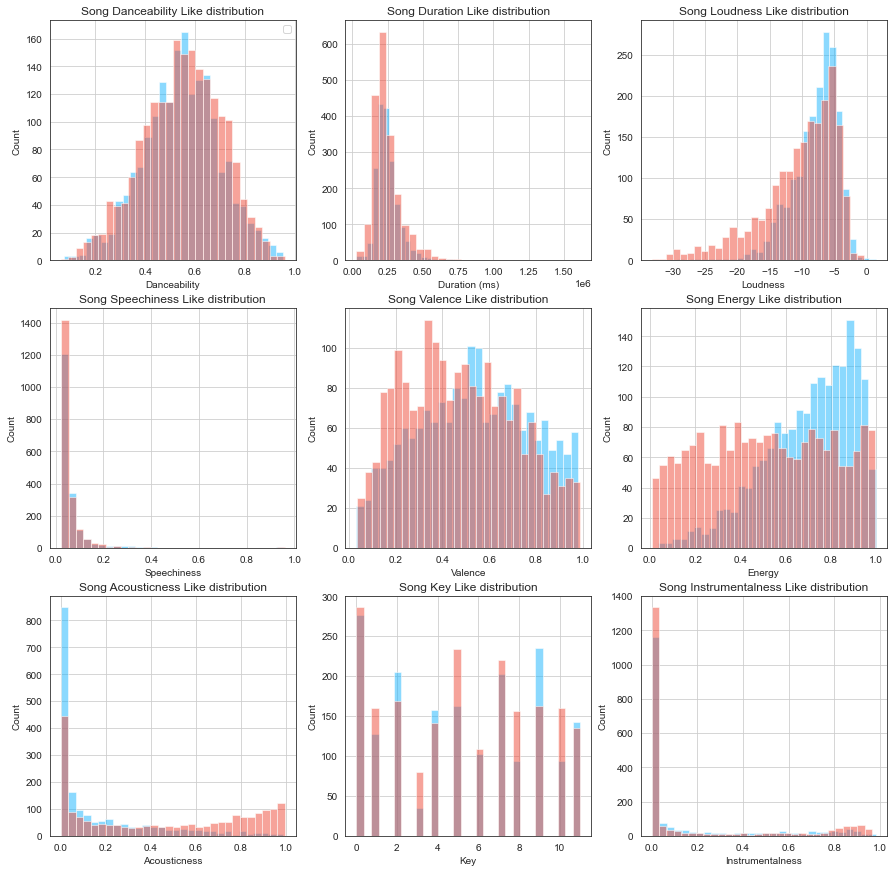

In [14]:
fig2= plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like distribution')
pos_danceability.hist(alpha =0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha=0.5, bins=30)
plt.legend(loc = 'upper right')

#Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like distribution')
pos_duration_ms.hist(alpha =0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration_ms.hist(alpha=0.5, bins=30)

#loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like distribution')
pos_loudness.hist(alpha =0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

#Speechiness
ax8 = fig2.add_subplot(334)
ax8.set_xlabel('Speechiness')
ax8.set_ylabel('Count')
ax8.set_title('Song Speechiness Like distribution')
pos_speechiness.hist(alpha =0.5, bins=30)
ax9 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

#Valence
ax10 = fig2.add_subplot(335)
ax10.set_xlabel('Valence')
ax10.set_ylabel('Count')
ax10.set_title('Song Valence Like distribution')
pos_valence.hist(alpha =0.5, bins=30)
ax11 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

#Energy
ax12 = fig2.add_subplot(336)
ax12.set_xlabel('Energy')
ax12.set_ylabel('Count')
ax12.set_title('Song Energy Like distribution')
pos_energy.hist(alpha =0.5, bins=30)
ax13 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)


#Acousticness
ax14 = fig2.add_subplot(337)
ax14.set_xlabel('Acousticness')
ax14.set_ylabel('Count')
ax14.set_title('Song Acousticness Like distribution')
pos_acousticness.hist(alpha =0.5, bins=30)
ax15 = fig2.add_subplot(337)
neg_acousticness.hist(alpha=0.5, bins=30)

#Key
ax16 = fig2.add_subplot(338)
ax16.set_xlabel('Key')
ax16.set_ylabel('Count')
ax16.set_title('Song Key Like distribution')
pos_key.hist(alpha =0.5, bins=30)
ax17 = fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)


#Instrumentalness
ax18 = fig2.add_subplot(339)
ax18.set_xlabel('Instrumentalness')
ax18.set_ylabel('Count')
ax18.set_title('Song Instrumentalness Like distribution')
pos_instrumentalness.hist(alpha =0.5, bins=30)
ax19 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)


In [15]:
# Decision tree with 100 minimum observations either side, to avoid overfitting
c = DecisionTreeClassifier(min_samples_split=100)


In [16]:
features = ['danceability', 'duration_ms', 'loudness', 'speechiness', 'valence', 'energy', 'acousticness', 'key', 'instrumentalness']

In [17]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [18]:
y_test

407     1
353     1
496     1
67      1
367     1
       ..
3732    0
3164    0
2128    0
3737    0
2855    0
Name: target, Length: 578, dtype: int64

In [19]:
X_test

,danceability,duration_ms,loudness,speechiness,valence,energy,acousticness,key,instrumentalness
407,0.6390,233187,-8.785,0.0308,0.785,0.812,0.133000,9,0.712000
353,0.0975,301947,-6.614,0.0454,0.120,0.685,0.690000,2,0.907000
496,0.4280,337240,-8.131,0.0296,0.208,0.641,0.008840,0,0.111000
67,0.7820,277960,-3.894,0.1150,0.542,0.966,0.099100,0,0.000011
367,0.5700,329979,-6.537,0.0270,0.487,0.777,0.002940,7,0.181000
...,...,...,...,...,...,...,...,...,...
3732,0.7320,284173,-8.001,0.0379,0.655,0.812,0.064400,11,0.000698
3164,0.5360,306613,-4.369,0.1210,0.278,0.987,0.000019,1,0.414000
2128,0.6550,248765,-5.212,0.0515,0.742,0.761,0.133000,5,0.053300
3737,0.7350,237000,-4.715,0.0281,0.871,0.795,0.544000,0,0.000009


In [20]:
dt = c.fit(X_train, y_train)

In [21]:
dt

DecisionTreeClassifier(min_samples_split=100)

In [22]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
   # img = misc.imread(path)  # imread is no longer available in scipy, using imageio instead
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)

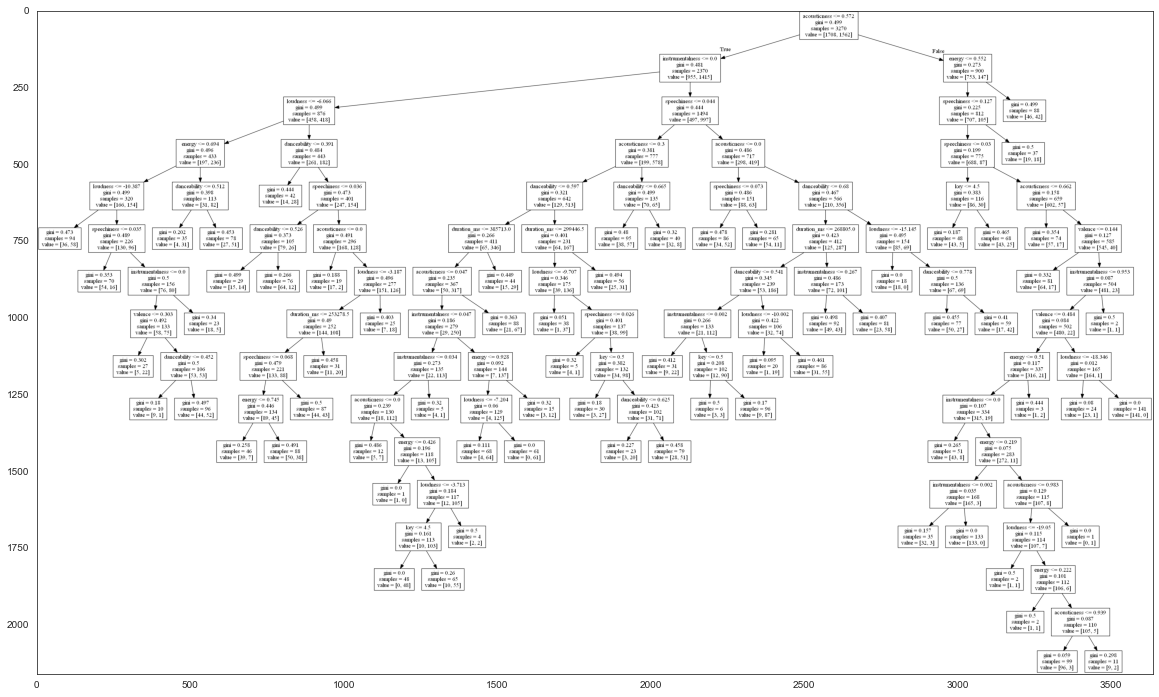

In [23]:
show_tree(dt, features, 'dec_tree_04.png')

In [24]:
y_pred = c.predict(X_test)

In [25]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [26]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100

In [27]:
print('Accuracy using Desicion Tree: ', round(score, 1), '%')

Accuracy using Desicion Tree:  68.0 %


In [28]:
#another way of showing the decision tree accuracy
dt.score(X_test,y_test)

0.6799307958477508

### graphviz requires a environment variable to be added in windows path, as below:
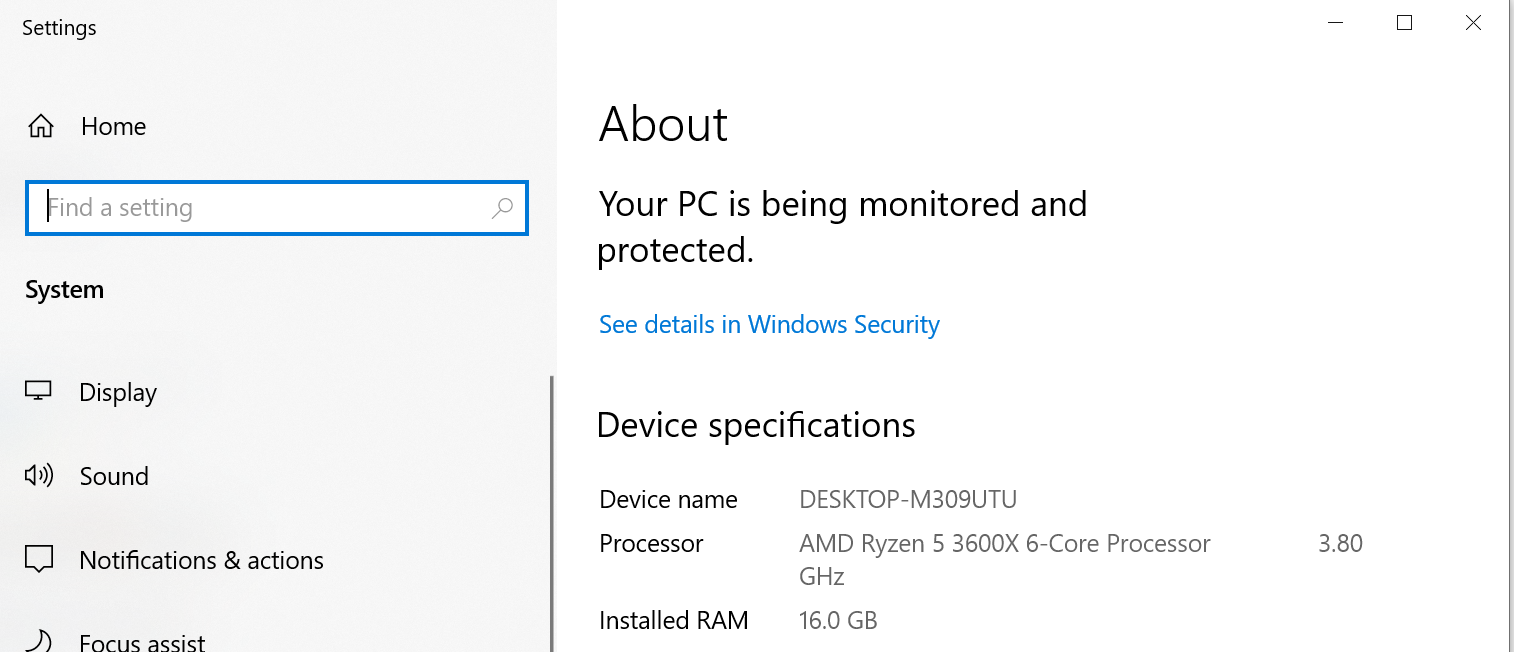
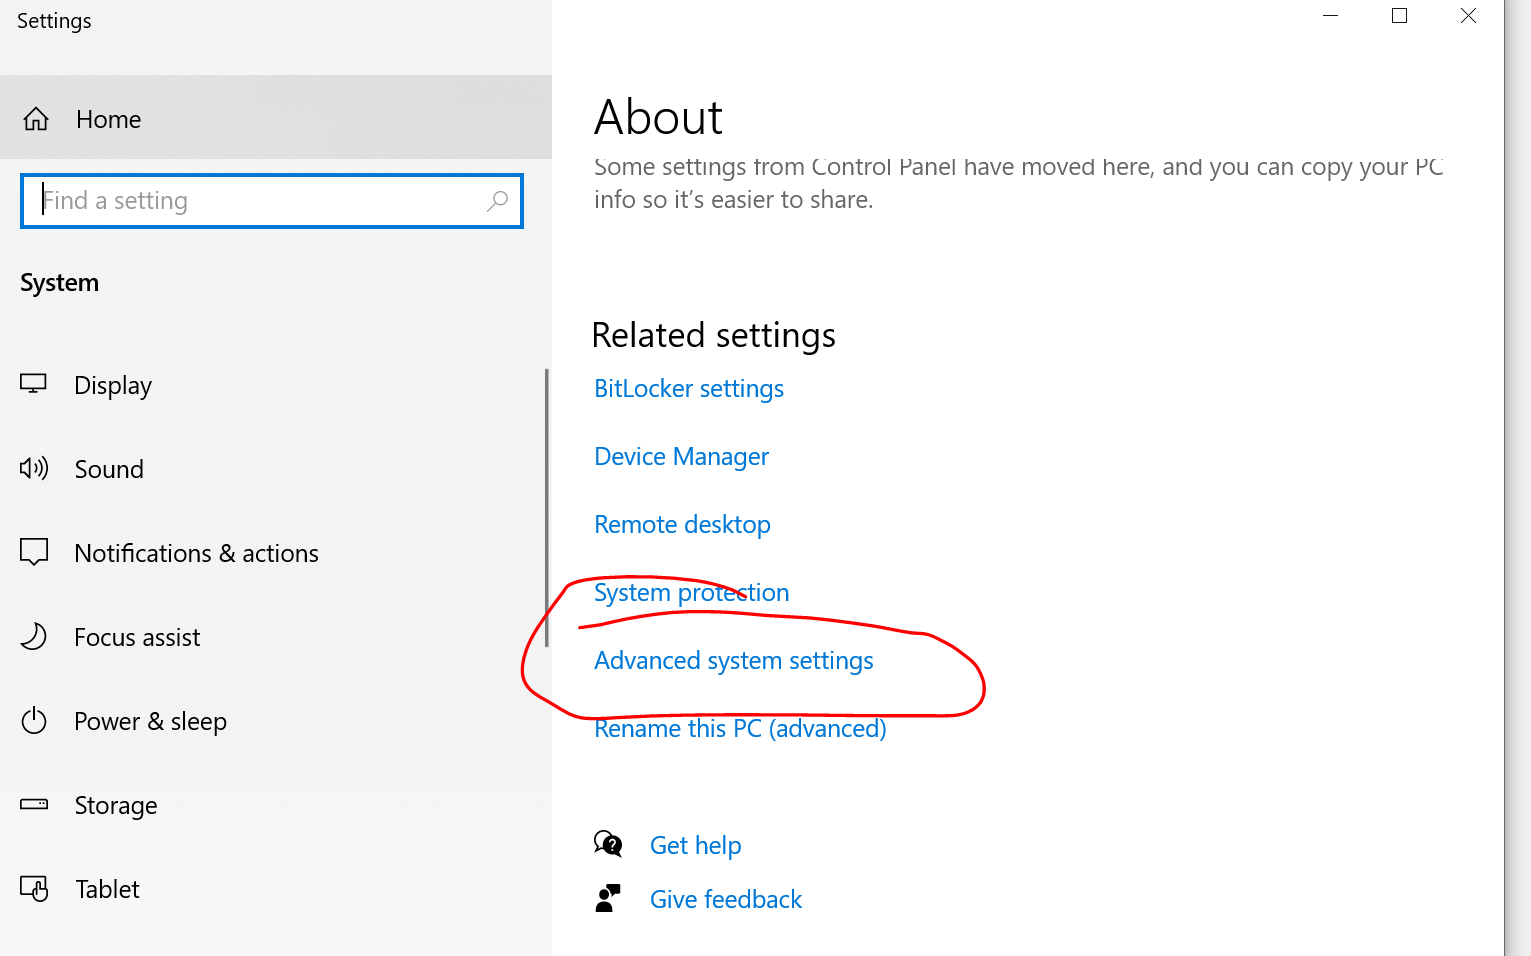
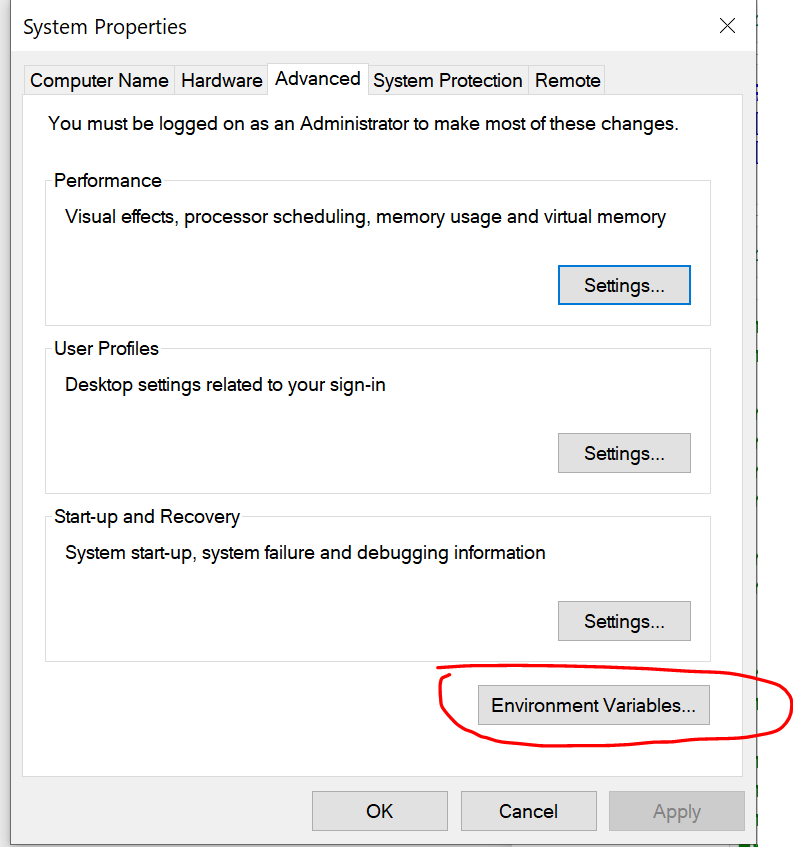
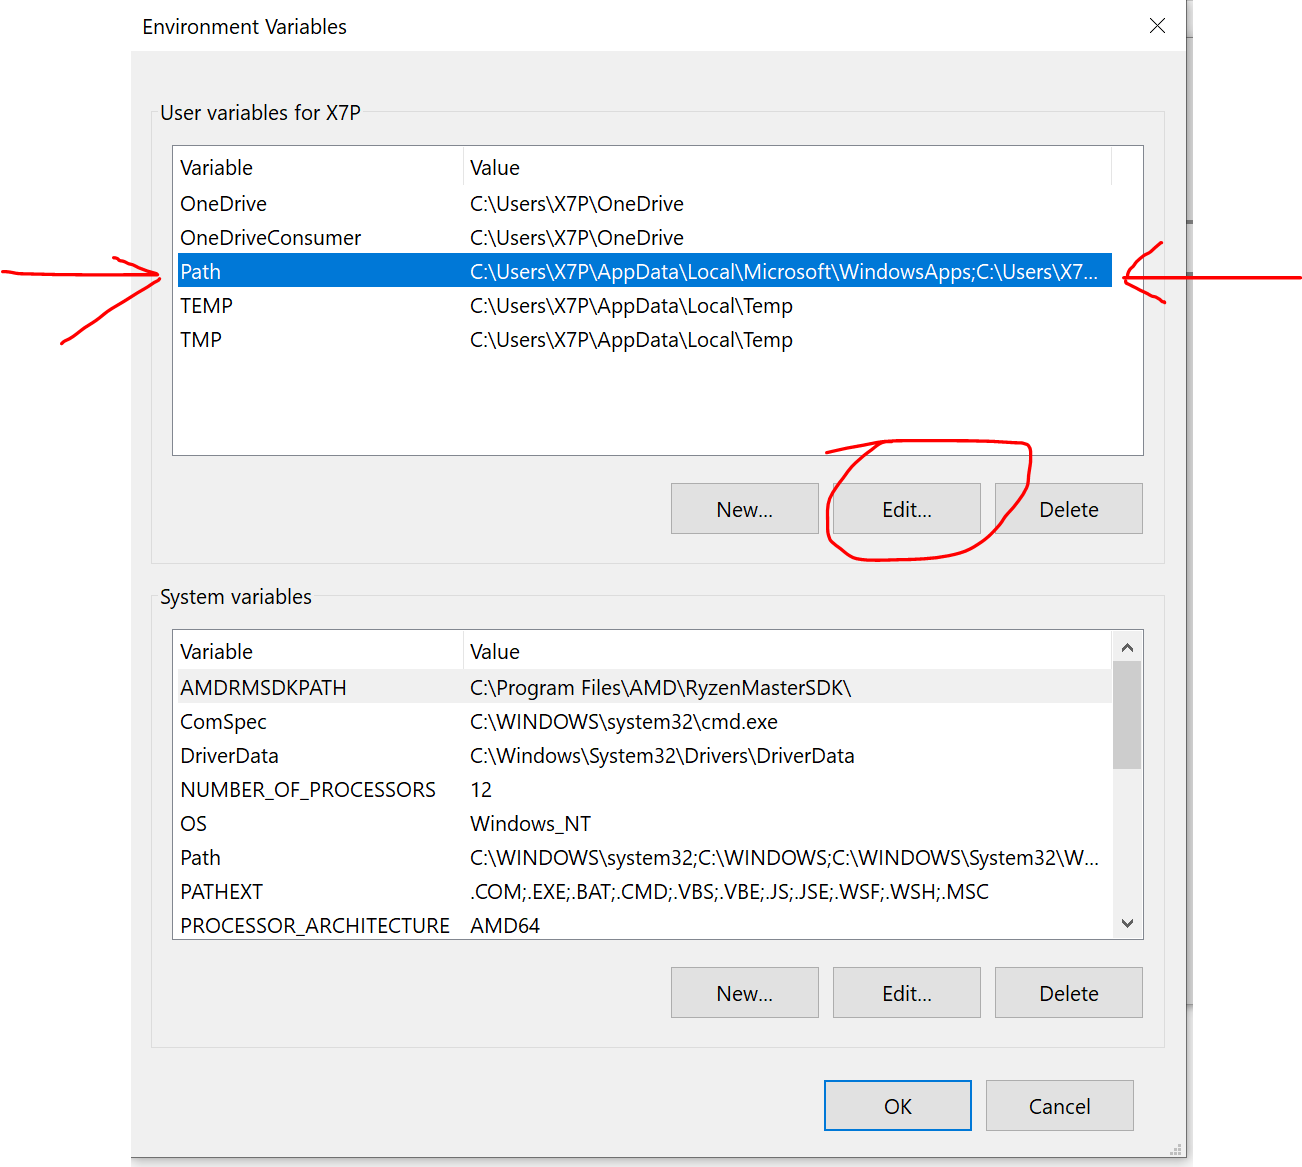
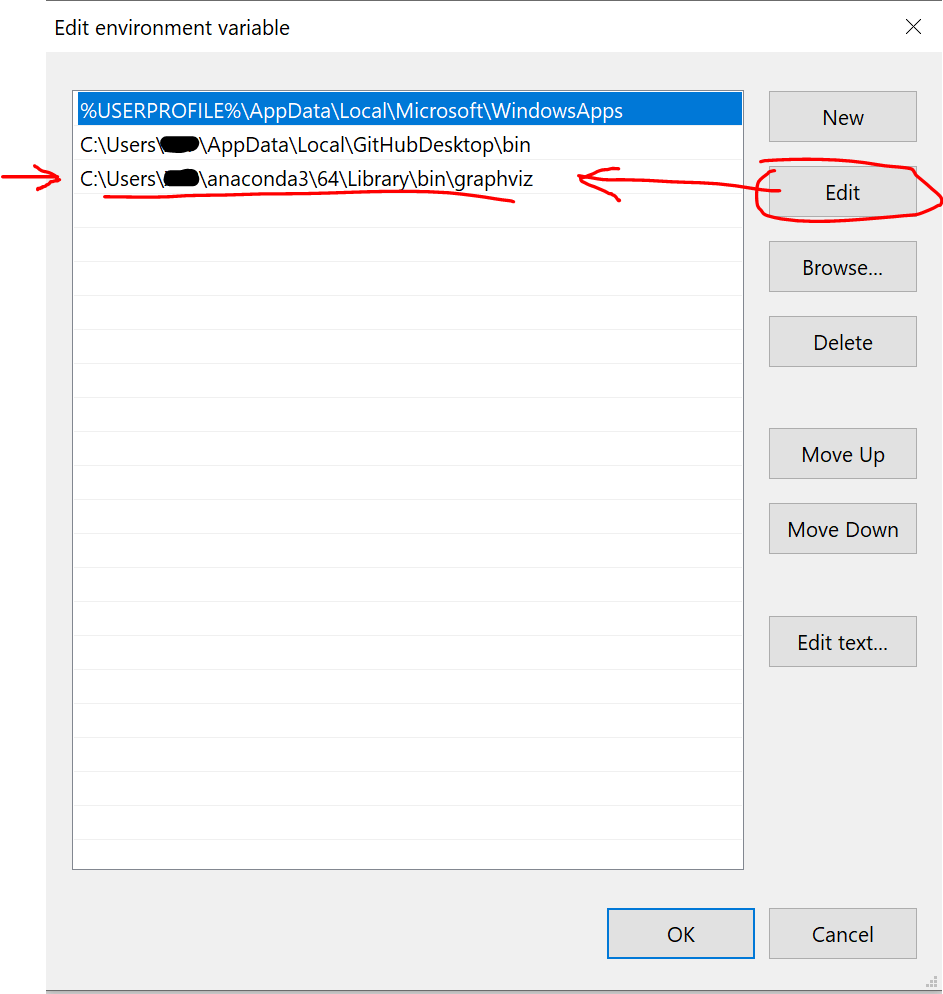